In [35]:
import numpy as np

##  Playing with Numpy Arrays

In [36]:
matrix = np.array([[1,2],[3,4],[5,4]])
print('matrix.shape'+str(matrix.shape))
weights = np.zeros(((1+ matrix.shape[1]),1))
print('weights: '+str(weights))
print('weights.shape'+str(weights.shape))
print('weights[1:]\n'+str(weights[1:]))
print('weights[0]\n'+str(weights[0]))

matrix.shape(3, 2)
weights: [[0.]
 [0.]
 [0.]]
weights.shape(3, 1)
weights[1:]
[[0.]
 [0.]]
weights[0]
[0.]


## About Feature Matrix

Please note that, we haven't add an additional column to our feature matrix instead we calculated weight[0] or theta0 (read theta not) separately (which is bias, b or intercept term, c in eqn of form y = mx +c). So, when we do matrix multplication of X and W[1:] we simply keep bias W[0] separate. 
In many ML literature you will find y = w0x0 + w1x1+...+ wnxn, we simly don't have x0, which is set as 1 by default in many notes but not here.

Don't worry, in short, we calculated, y = (w1x1+w2x2+...+wnxn) + w0

Here, X is m x n matrix, m is number of sample, n is number of features.
W is matrix
"""

In [37]:
#Just to show how perceptron looks like
from IPython.display import Image
i = Image(url='http://ataspinar.com/wp-content/uploads/2016/11/perceptron_schematic_overview.png')
i

## Rosenblatt's Perceptron 

If you find any error, let me know. I will update!

A very good article on Medium:
https://medium.com/@purnasaigudikandula/intro-to-deep-learning-with-pytorch-part-1-53e111610575

Can you find any differences ? Answer when you can understand this code completely!

In [38]:
#Perceptron class
class Perceptron(object): 
    
    #initializing point
    def __init__(self, alpha = 0.01, n_iter = 10): 
        #alpha : is AKA eta, learning rate
        self.alpha = alpha
        #n_iter : number of iterations
        self.n_iter = n_iter
        
    #fit training data, fit includes percpetron steps which uses all samples in every iterations 
    def fit(self, X, y):
        #X :  is a matrix of dimension number_of_samples x number_of_features
        #y : is a column vector or target value of shape number_of_samples x 1
        
        #initializing weight vectors with zeros
        #w_ : weight vector
        #X.shape[1] is the number of columns/features, we need same number of weights
        self.w_ = np.zeros(1+X.shape[1]) 
        #list to append errors for all iterations
        self.errors_ = []
        
        for _ in range(self.n_iter): #num of epochs
            errors = 0 #number of errors per iteration
            #----> 
            for xi, yi in zip(X,y): #perceptron steps
                # yi is target, xi is the i-th row's features
                y_hat = self.predict(xi)
                err = yi - y_hat
                update = err*self.alpha
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update != 0.0) #increase the number if any error occurs
            #----->
            #append num of errors
            self.errors_.append(errors)
        
        return self #trained instance/object
    
    #step_function determines the prediction, also called heavyside function
    def predict(self, X):
        #y_hat = WX + b 
        #y_hat >= threshold  1 else -1
        y_hat = self.net_input(X)
        #return 1 if y_hat >= 0.0 else -1
        return np.where(y_hat >= 0.0, 1, -1)
    #linear combiner or input
    def net_input(self, X):
        # w_[1:] is all other weights and w_[0] is bias, b
        # WX + b 
        return np.dot(X, self.w_[1:]) + self.w_[0] 
    

## Training Perceptron, Iris dataset

In [39]:
#read dataset
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [40]:
#df.iloc[10:20, 0:] #this shows all samples from 10 to 19th row and all columns! Use iloc use indexing
df.head() #this shows first five samples

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
from matplotlib import pyplot as plt

In [42]:
y = df.iloc[0:100, 4].values  #slicing first 100 sample's target/y values

In [43]:
#Since we are dealing with binary classification problem using perceptron
# we are going to assign 1 and -1 to column 4's values
y = np.where(y == 'Iris-setosa', -1, 1)

In [44]:
X = df.iloc[0:100, [0, 2]].values #100 samples, 2 feautes  for each sample 

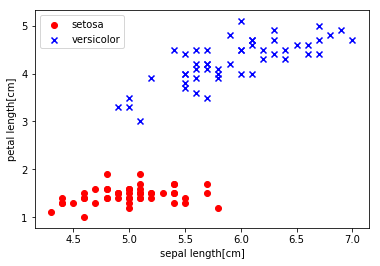

In [45]:
#ploting samples, 0-49 : setosa, 50-99 : versicolor
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length[cm]') #first column of features
plt.ylabel('petal length[cm]') #second column of featues
plt.legend(loc='upper left')
plt.show()

In [46]:
#Training
ppn = Perceptron(alpha = .1, n_iter = 10)
ppn.fit(X,y)

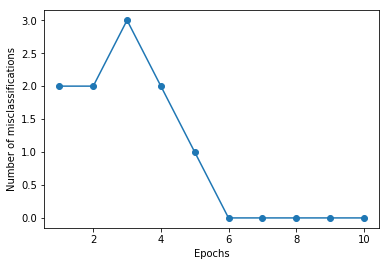

In [47]:
#ploting epochs vs number of misclassifications
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

Note that , our perceptron algorithm converged after 6 iterations!

## Linear Boundary
This part is relevant but if you don't understand all of it, just use it. This function allows us to draw the linear boundary once we trained our perctron.

Resources: 
https://www.quora.com/Can-you-explain-to-me-what-the-meshgrid-function-in-Python-does-step-by-step

https://plot.ly/numpy/meshgrid/



In [48]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

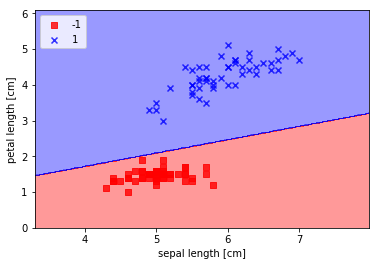

In [49]:
#now use the above function to draw Linear Boundary
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()